In [152]:
from __future__ import division
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys

In [153]:
nb_dir = '/home/dup193/work/double_pulse/stat_analysis'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
from event_selection import EventSelection

In [154]:
data_tc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_1_1.npy',mmap_mode='r')
data_tn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuTau_2_1.npy',mmap_mode='r')
data_mc0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_1_1.npy',mmap_mode='r')
data_mn0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuMu_2_1.npy',mmap_mode='r')
data_ec0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_1_1.npy',mmap_mode='r')
data_en0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_2_1.npy',mmap_mode='r')
data_eg0 = np.load('/fastio2/dasha/double_pulse/data_FLUXES_NuE_3_1.npy',mmap_mode='r')
data_c0 = np.load('/fastio2/dasha/double_pulse/data_MuonGun_all.npy',mmap_mode='r')

In [155]:
data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c = \
    EventSelection(data_tc0,data_tn0,data_mc0,data_mn0,data_ec0,data_en0,data_eg0,data_c0)
print(data_tc0.shape,data_tn0.shape,data_mc0.shape,data_mn0.shape,data_ec0.shape,data_en0.shape,data_eg0.shape,data_c0.shape)
print(data_tc.shape,data_tn.shape,data_mc.shape,data_mn.shape,data_ec.shape,data_en.shape,data_eg.shape,data_c.shape)

(128278,) (27754,) (462405,) (54601,) (420185,) (72626,) (4267,) (246367,)
(8311,) (47,) (330,) (105,) (66,) (62,) (20,) (245,)


In [177]:
def PlotS(data1,data2,weights1,weights2,livetime,name,label,bins,scale,loc = 1):
    fig = plt.figure(figsize=(20, 5),facecolor ='w')
    gs = gridspec.GridSpec(2,1, height_ratios=[3.5,2], wspace=0.04, hspace=0.04)
    ax = fig.add_subplot(gs[0])
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title(name, fontsize = 16)
    ax.text(0.01,0.6,'#Initial '+str(len(data1)), transform=ax.transAxes, color = "black",fontsize=16)
    ax.text(0.01,0.5,'#Final '+str(len(data2)), transform=ax.transAxes, color = "black",fontsize=16)
    ax.set_ylim(10**(-6),10**(1))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)
    
    bins3 = bins[(bins >= 98372.921875) & (bins <= 4655043.75)]
    n_1, bins_1, patches_1 = ax.hist(data1, weights = weights1*livetime, histtype = 'step',edgecolor = 'b', lw =2,  bins = bins, label = "Initial")  
    n_12, bins_12 = np.histogram(data1, bins =bins_1, weights = (weights1*livetime)**2)
    n_2, bins_2, patches_2 = ax.hist(data2, weights = weights2*livetime, histtype = 'step',edgecolor = 'r', lw =2,  bins = bins, label = "Final")  
    n_22, bins_22 = np.histogram(data2, bins =bins_2, weights = (weights2*livetime)**2)
    #n_3, bins_3, patches_3 = ax.hist(data2, weights = weights2*livetime, histtype = 'stepfilled',color = 'r',alpha=0.5, lw =2,  bins = bins3, label = "(90%)")  
    
    bin_centers = 0.5*(bins_1[1:] + bins_1[:-1])
    plt.errorbar(bin_centers, n_1, yerr = np.sqrt(n_12), lw =1, capsize = 2,fmt='.b')
    plt.errorbar(bin_centers, n_2, yerr = np.sqrt(n_22), lw =1, capsize = 2,fmt='.r')
    plt.legend(loc=loc)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        ns = np.nan_to_num(n_2/n_1)
        err = ns*np.sqrt((np.sqrt(n_12)/n_1)**2+(np.sqrt(n_22)/n_2)**2)
    
    ax = fig.add_subplot(gs[1])
    ax.set_xscale(scale)
    ax.set_yscale('log')
    ax.set_title('Ratio BurnSample/Corsika', fontsize = 16)
    ax.set_ylim(10**(-1),10**(1))
    ax.set_xlabel(label, fontsize = 16)                                                              
    ax.set_ylabel("Ratio", fontsize = 16) 
    #ax.axhline(y =1, ls = '--')
    #ax.axvline(x=lp,c='g',lw =2,ls = '--')
    plt.bar(bins_1[:-1],ns,np.diff(bins_1), yerr = err, capsize = 2, fill =False)
    plt.errorbar(bin_centers, ns, yerr = err, lw =1, capsize = 2,fmt='.k')
    

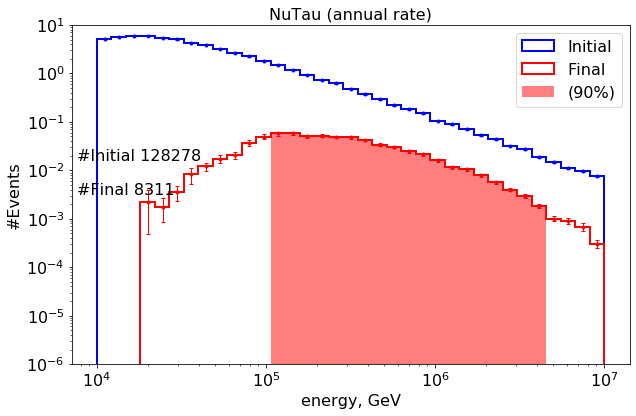

In [159]:
PlotS(data_tc0['primary']['energy'],data_tc['primary']['energy'],data_tc0['weight_val_0']['nom'],data_tc['weight_val_0']['nom'],secs_per_year,'NuTau (annual rate)','energy, GeV',np.logspace(np.log10(10000),np.log10(10000000),36),'log')

In [99]:
#90% containment region
p5 = np.percentile(data_tc0['primary']['energy'][mask_tc], 5)
p95 = np.percentile(data_tc0['primary']['energy'][mask_tc], 95)
print(p5,p95)

98372.921875 4655043.75


In [183]:
mask_tau_0 = abs(data_tc0['prim_daughter']['pdg']) == 15
mask_tau = abs(data_tc['prim_daughter']['pdg']) == 15
sum(mask_tau)

7933

(array([505., 356., 247., 174., 131.,  85.,  54.,  32.,  19.,   5.]),
 array([9.3142803e+03, 1.2178745e+06, 2.4264345e+06, 3.6349948e+06,
        4.8435550e+06, 6.0521150e+06, 7.2606755e+06, 8.4692350e+06,
        9.6777960e+06, 1.0886356e+07, 1.2094916e+07], dtype=float32),
 <a list of 10 Patch objects>)

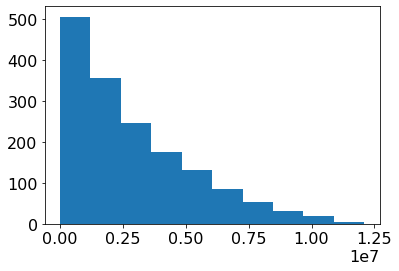

In [66]:
plt.hist(data_tc0['prim_daughter']['length'][mask_tau])

In [72]:
print(np.unique(data_tc0['prim_daughter']['pdg'],return_counts=True))
np.unique(data_tc0['prim_daughter']['pdg'][mask_tc],return_counts=True)

(array([-2000001006,         -16,         -15,          15,          16],
      dtype=int32), array([38661,   957, 45950, 42058,   651]))


(array([-2000001006,         -16,         -15,          15,          16],
       dtype=int32),
 array([ 350,   14, 3999, 3934,   14]))

In [76]:
print(data_tc0['prim_daughter']['length'].shape)
print(data_tc0['prim_daughter']['length'][mask_tau].shape)

(128277,)
(88008,)


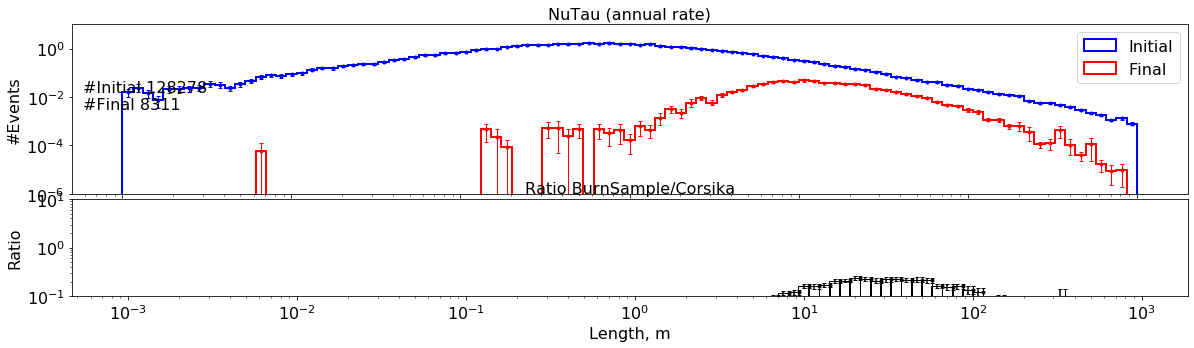

In [178]:
PlotS(data_tc0['prim_daughter']['length'],data_tc['prim_daughter']['length'],data_tc0['weight_val_0']['nom'],data_tc['weight_val_0']['nom'],secs_per_year,'NuTau (annual rate)','Length, m',np.logspace(np.log10(0.001),np.log10(1000),100),scale ='log')

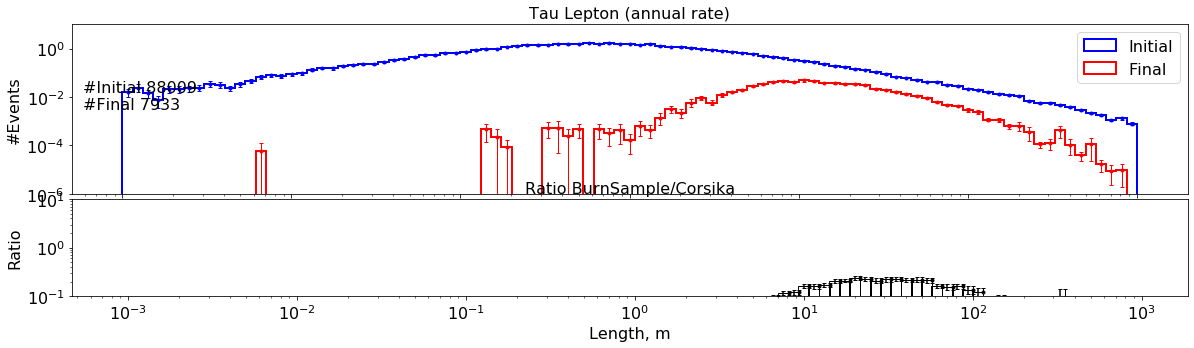

In [184]:
PlotS(data_tc0['prim_daughter']['length'][mask_tau_0],data_tc['prim_daughter']['length'][mask_tau],data_tc0['weight_val_0']['nom'][mask_tau_0],data_tc['weight_val_0']['nom'][mask_tau],secs_per_year,'Tau Lepton (annual rate)','Length, m',np.logspace(np.log10(0.001),np.log10(1000),100),'log')

In [68]:
mm = data_tc0['prim_daughter']['length'] < 0.01
data_tc0[mm & mask_tc & mask_tau]['primary']

array([([3802127166,     416175], -16, 306237.94, [ -377.35538, -1436.9038 ,  1947.8269 ], [0.4980348, 4.560597 ], 2515.1653, 2193.8923)],
      dtype=[('tree_id', '<u4', (2,)), ('pdg', '<i4'), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')])